In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'test.csv']


In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [3]:
train.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,26.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,30.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,45.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,43.0,2,N,4.0,1


In [4]:
test.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating
0,1626_45,T_1,T,131,45,offline,intermediate,1626,F,Matriculation,3,50.0,2,N,4.0
1,11020_130,Y_3,Y,135,130,online,easy,11020,M,Bachelors,3,22.0,4,N,4.0
2,12652_146,Y_2,Y,120,146,online,easy,12652,M,Matriculation,3,24.0,2,N,3.0
3,7038_72,V_4,V,122,72,offline,vary hard,7038,F,High School Diploma,1,27.0,2,N,2.0
4,888_71,V_4,V,122,71,offline,intermediate,888,F,Matriculation,3,18.0,2,N,2.0


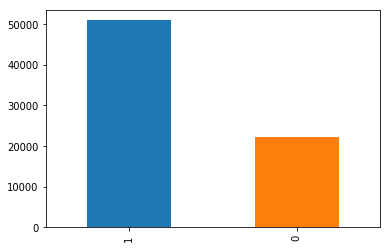

In [5]:
train['is_pass'].value_counts().plot(kind = 'bar')

In [6]:
print('percentage of 1s class :' , ((len(train[train['is_pass'] == 1]))/len(train))*100)
print('No of 1s class : ' , len(train[train['is_pass'] == 1]))
print('percentage of 0s class :' , ((len(train[train['is_pass'] == 0]))/len(train))*100)
print('No of 0s class : ' , len(train[train['is_pass'] == 0]))

percentage of 1s class : 69.54078772882005
No of 1s class :  50867
percentage of 0s class : 30.459212271179954
No of 0s class :  22280


In [10]:
## deal with the missing values 
## fill the trainee_engagement_rating with the mode value 
train['trainee_engagement_rating'].fillna(1, inplace = True)

In [11]:
## build the age features 
train['age17_40'] = [1 if ((i>=17)&(i<40)) else 0 for i in train.age]
train['age40+'] = [1 if i >= 40 else 0 for i in train.age]                #  modified version

In [12]:
## drop the columns 
col_drop = ['program_id', 'id', 'age', 'test_id','trainee_id']    ## we will eliminate age from here.since wew ill use ut as it is.
train_o = train.drop(col_drop , axis = 1)
print(train_o.shape)
train_o.head()

(73147, 13)


,program_type,program_duration,test_type,difficulty_level,gender,education,city_tier,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,age17_40,age40+
0,Y,136,offline,intermediate,M,Matriculation,3,5,N,1.0,0,1,0
1,T,131,offline,easy,F,High School Diploma,4,2,N,3.0,1,1,0
2,Z,120,online,easy,M,Matriculation,1,1,N,2.0,1,0,1
3,T,117,offline,easy,F,Matriculation,3,4,N,1.0,1,0,0
4,V,131,offline,intermediate,F,High School Diploma,1,2,N,4.0,1,0,1


In [ ]:
## feature transformation 
#def feat_transform(data):
    #data['education'] = data['education'].replace('Masters', 'Bachelors')
   #data['total_programs_enrolled'] = [5 if i > 5 else i for i in data.total_programs_enrolled]

In [13]:
## create dummies 
columns = ['program_type', 'test_type','program_duration','city_tier', 'difficulty_level', 'gender', 'education', 'total_programs_enrolled', 'is_handicapped', 'trainee_engagement_rating']
train_orig = pd.get_dummies(train_o , columns = columns)    ## remove city_tier give it a try 
print(train_orig.shape)                                     ## add city_tier in another try 
print(train_orig.columns)

(73147, 57)
Index(['is_pass', 'age17_40', 'age40+', 'program_type_S', 'program_type_T',
       'program_type_U', 'program_type_V', 'program_type_X', 'program_type_Y',
       'program_type_Z', 'test_type_offline', 'test_type_online',
       'program_duration_117', 'program_duration_120', 'program_duration_121',
       'program_duration_122', 'program_duration_130', 'program_duration_131',
       'program_duration_133', 'program_duration_134', 'program_duration_135',
       'program_duration_136', 'city_tier_1', 'city_tier_2', 'city_tier_3',
       'city_tier_4', 'difficulty_level_easy', 'difficulty_level_hard',
       'difficulty_level_intermediate', 'difficulty_level_vary hard',
       'gender_F', 'gender_M', 'education_Bachelors',
       'education_High School Diploma', 'education_Masters',
       'education_Matriculation', 'education_No Qualification',
       'total_programs_enrolled_1', 'total_programs_enrolled_2',
       'total_programs_enrolled_3', 'total_programs_enrolled_4',
   

In [14]:
## ok, now we are good to go to apply smote, but before that
labels = train_orig['is_pass']
features = train_orig.drop('is_pass' , axis = 1)
features.head()

,age17_40,age40+,program_type_S,program_type_T,program_type_U,program_type_V,program_type_X,program_type_Y,program_type_Z,test_type_offline,test_type_online,program_duration_117,program_duration_120,program_duration_121,program_duration_122,program_duration_130,program_duration_131,program_duration_133,program_duration_134,program_duration_135,program_duration_136,city_tier_1,city_tier_2,city_tier_3,city_tier_4,difficulty_level_easy,difficulty_level_hard,difficulty_level_intermediate,difficulty_level_vary hard,gender_F,gender_M,education_Bachelors,education_High School Diploma,education_Masters,education_Matriculation,education_No Qualification,total_programs_enrolled_1,total_programs_enrolled_2,total_programs_enrolled_3,total_programs_enrolled_4,total_programs_enrolled_5,total_programs_enrolled_6,total_programs_enrolled_7,total_programs_enrolled_8,total_programs_enrolled_9,total_programs_enrolled_10,total_programs_enrolled_11,total_programs_enrolled_12,total_programs_enrolled_14,is_handicapped_N,is_handicapped_Y,trainee_engagement_rating_1.0,trainee_engagement_rating_2.0,trainee_engagement_rating_3.0,trainee_engagement_rating_4.0,trainee_engagement_rating_5.0
0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [15]:
train_x, test_x, train_y, test_y = train_test_split(features, labels, test_size=0.25, random_state=0)

In [27]:
oversampler=SMOTE(random_state=0)
train_x, train_y = oversampler.fit_sample(train_x,train_y.values.ravel())

In [28]:
type(train_x)


numpy.ndarray

In [30]:
## Convert the numpy arrays into the data frame 
train_x = pd.DataFrame(train_x, columns = ['age17_40', 'age40+', 'program_type_S', 'program_type_T',
       'program_type_U', 'program_type_V', 'program_type_X', 'program_type_Y',
       'program_type_Z', 'test_type_offline', 'test_type_online',
       'program_duration_117', 'program_duration_120', 'program_duration_121',
       'program_duration_122', 'program_duration_130', 'program_duration_131',
       'program_duration_133', 'program_duration_134', 'program_duration_135',
       'program_duration_136', 'city_tier_1', 'city_tier_2', 'city_tier_3',
       'city_tier_4', 'difficulty_level_easy', 'difficulty_level_hard',
       'difficulty_level_intermediate', 'difficulty_level_vary hard',
       'gender_F', 'gender_M', 'education_Bachelors',
       'education_High School Diploma', 'education_Masters',
       'education_Matriculation', 'education_No Qualification',
       'total_programs_enrolled_1', 'total_programs_enrolled_2',
       'total_programs_enrolled_3', 'total_programs_enrolled_4',
       'total_programs_enrolled_5', 'total_programs_enrolled_6',
       'total_programs_enrolled_7', 'total_programs_enrolled_8',
       'total_programs_enrolled_9', 'total_programs_enrolled_10',
       'total_programs_enrolled_11', 'total_programs_enrolled_12',
       'total_programs_enrolled_14', 'is_handicapped_N', 'is_handicapped_Y',
       'trainee_engagement_rating_1.0', 'trainee_engagement_rating_2.0',
       'trainee_engagement_rating_3.0', 'trainee_engagement_rating_4.0',
       'trainee_engagement_rating_5.0'])
train_y = pd.DataFrame(train_y, columns = ['is_pass'])

In [57]:
train_y = pd.to_numeric(train_y['is_pass'])

In [58]:
sum(train_y)

38098

In [33]:

from sklearn.metrics import roc_curve, auc, precision_recall_curve, classification_report, average_precision_score
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance, to_graphviz
from sklearn.metrics import roc_auc_score, r2_score, accuracy_score, classification_report 

In [34]:
## lets fit in our first ml model 

dtrain = xgb.DMatrix(data=train_x, label=train_y)
params = {
    "Objective": 'gbtree',
    "eval_metric": 'auc',
    #"eta": 0.1
}
cv = xgb.cv(params=params, dtrain=dtrain, num_boost_round=100, nfold=5, seed=41, early_stopping_rounds= 10)
cv.tail(1)

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
99,0.863964,0.000958,0.840364,0.001337


In [35]:
xgbcl = XGBClassifier(n_estimators=14, seed=41)
xgbcl.fit(train_x, train_y)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:96: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=14,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=41, silent=True,
       subsample=1)

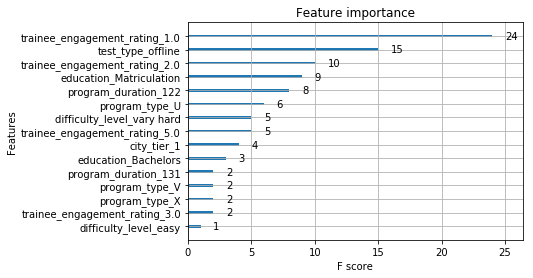

In [36]:
xgb.plot_importance(xgbcl)

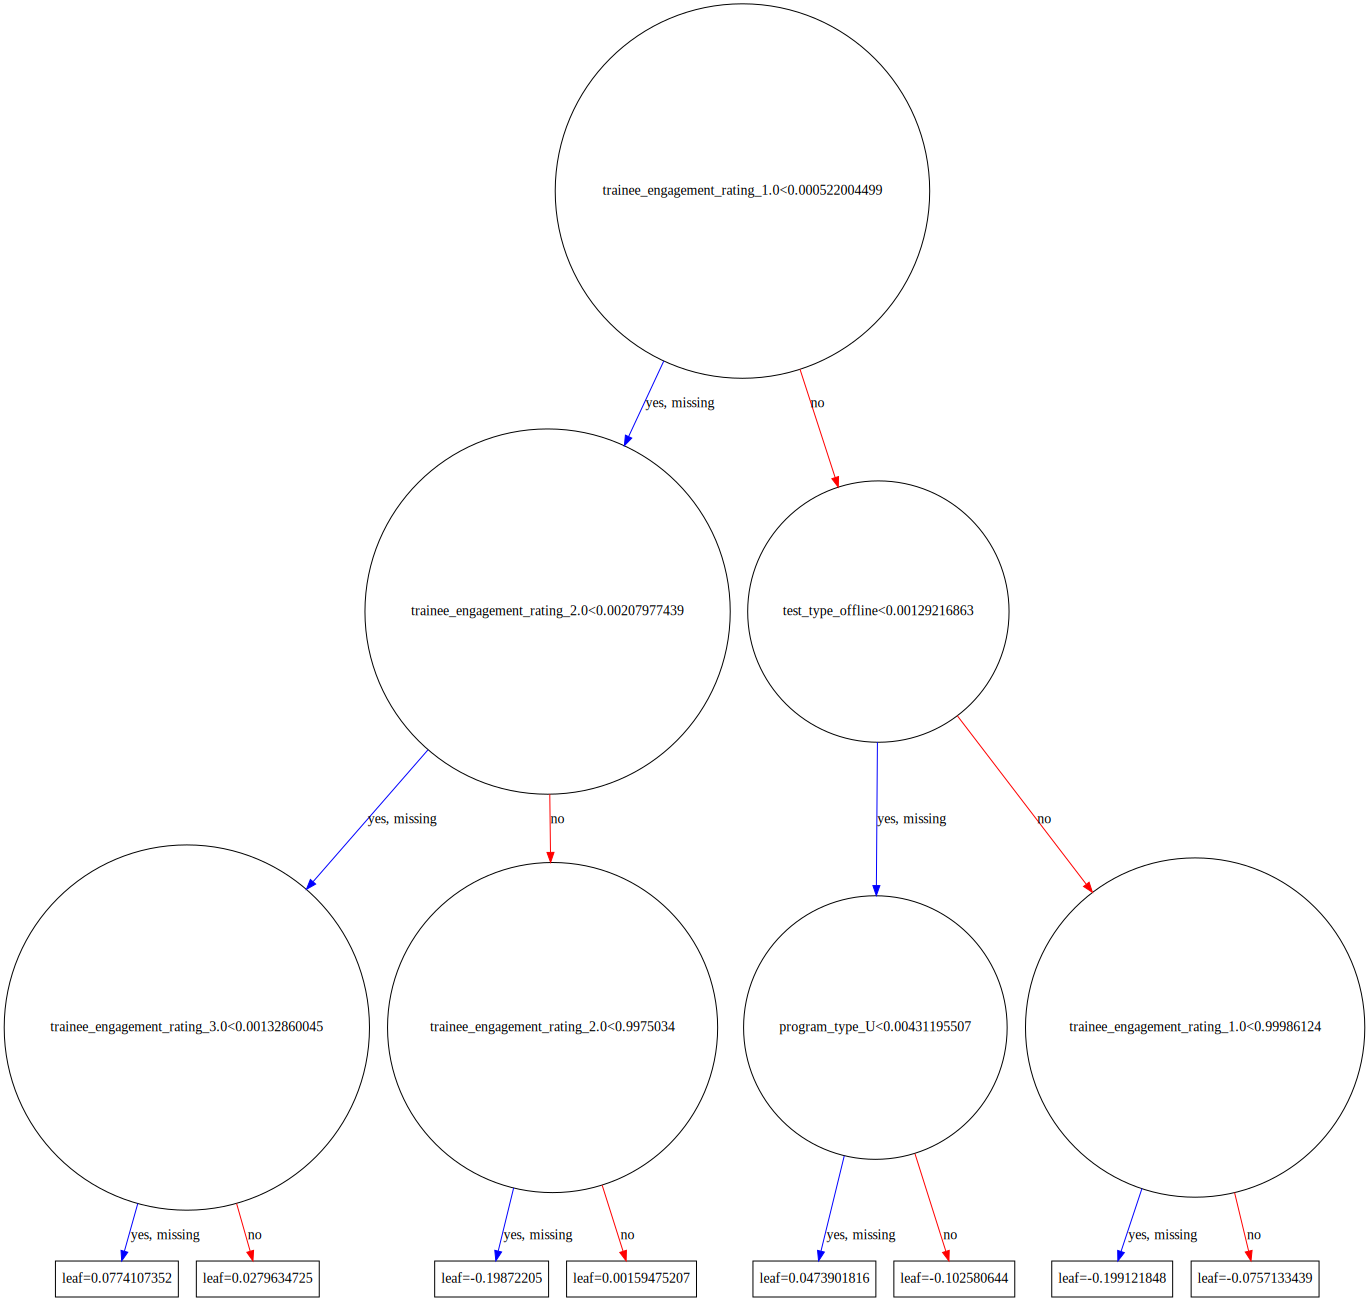

In [37]:
xgb.to_graphviz(xgbcl)

[0]	train-auc:0.693096+0.00825405	test-auc:0.692547+0.00689193
[100]	train-auc:0.831454+0.000517294	test-auc:0.8251+0.00220226
[200]	train-auc:0.845572+0.000641813	test-auc:0.836506+0.00205834
[300]	train-auc:0.851349+0.00084038	test-auc:0.839166+0.00200546
[400]	train-auc:0.856063+0.000840676	test-auc:0.840714+0.00211503
[500]	train-auc:0.860466+0.00085155	test-auc:0.841978+0.00233681
[600]	train-auc:0.864639+0.000777575	test-auc:0.843005+0.00231714
[700]	train-auc:0.868384+0.000851019	test-auc:0.843819+0.00241678
[800]	train-auc:0.871564+0.00078827	test-auc:0.844529+0.00251015
[900]	train-auc:0.874452+0.000812435	test-auc:0.844984+0.00251274
[1000]	train-auc:0.877097+0.000747839	test-auc:0.845302+0.00261215
[1100]	train-auc:0.879318+0.000726276	test-auc:0.84562+0.00253838
[1200]	train-auc:0.881365+0.000663237	test-auc:0.84582+0.00248656
[1300]	train-auc:0.883204+0.000643477	test-auc:0.845932+0.00249866
num_boost_rounds=1259


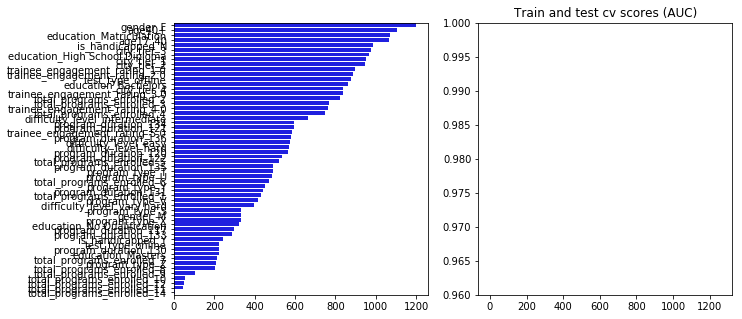

Threshold: 0.5
Accuracy:  70.99 %
R2:        -0.3769
AUC:       0.6485
Misclass.: 5305 (~29.01 %) out of 18287
             precision    recall  f1-score   support

       stay     0.5204    0.4935    0.5066      5518
       left     0.7859    0.8034    0.7946     12769

avg / total     0.7058    0.7099    0.7077     18287



In [59]:
### XGBoost
# prepare dict of params for xgboost to run with
xgb_params = {
    'n_trees': 100, 
    'eta': 0.1,
    'max_depth': 5,
    'subsample': 0.75,
    'colsample_bytree': 0.75,
    'objective': 'binary:logistic',
    'scale_pos_weight': float(len(train_y)-sum(train_y)) / sum(train_y),
    'eval_metric': 'auc',
    'silent': 1
}
# form DMatrices for Xgboost training
dtrain_xgb = xgb.DMatrix(train_x, train_y)
dtest_xgb = xgb.DMatrix(test_x, test_y)
# xgboost, cross-validation
cv_result_xgb = xgb.cv(xgb_params, 
                   dtrain_xgb, 
                   num_boost_round=5000,
                   nfold = 5,
                   stratified=True,
                   early_stopping_rounds=50,
                   verbose_eval=100, 
                   show_stdv=True
                  )
num_boost_rounds_xgb = len(cv_result_xgb)
print('num_boost_rounds=' + str(num_boost_rounds_xgb))
# train model
model_xgb = xgb.train(dict(xgb_params, silent=0), 
                      dtrain_xgb, 
                      num_boost_round=num_boost_rounds_xgb)

### Visualizations about the training process:
plt.figure(figsize=(10,5))
# Features importance
plt.subplot(1,2,1)
features_score_xgb = pd.Series(model_xgb.get_fscore()).sort_values(ascending=False)
sns.barplot(x=features_score_xgb.values, 
            y=features_score_xgb.index.values, 
            orient='h', color='b')
# CV scores
plt.subplot(1,2,2)
train_scores = cv_result_xgb['train-auc-mean']
train_stds = cv_result_xgb['train-auc-std']
plt.plot(train_scores, color='blue')
plt.fill_between(range(len(cv_result_xgb)), 
                 train_scores - train_stds, 
                 train_scores + train_stds, 
                 alpha=0.1, color='blue')
test_scores = cv_result_xgb['test-auc-mean']
test_stds = cv_result_xgb['test-auc-std']
plt.plot(test_scores, color='red')
plt.fill_between(range(len(cv_result_xgb)), 
                 test_scores - test_stds, 
                 test_scores + test_stds, 
                 alpha=0.1, color='red')
plt.title('Train and test cv scores (AUC)')
plt.ylim(0.96,1)
plt.show()

### Evaluation
threshold = 0.5
y_pred_xgb = model_xgb.predict(dtest_xgb)
y_cl_xgb = [1 if x > threshold else 0 for x in y_pred_xgb]
print('Threshold:', threshold)
print('Accuracy:  {:.2f} %'.format(accuracy_score(test_y, y_cl_xgb)*100))
print('R2:        {:.4f}'.format(r2_score(test_y, y_cl_xgb)))
print('AUC:       {:.4f}'.format(roc_auc_score(test_y, y_cl_xgb)))
mis = sum(np.abs(test_y - np.array(y_cl_xgb)))
print('Misclass.: {} (~{:.2f} %) out of {}'.format(mis, 
                                                   float(mis)/len(test_y)*100, 
                                                   len(test_y)))
print(classification_report(test_y, 
                            y_cl_xgb, 
                            labels=[0,1], 
                            target_names=['stay', 'left'], 
                            digits=4))

In [60]:
## try to apply for the actual test data
## deal with the missing values 
## fill the trainee_engagement_rating with the mode value 
test['trainee_engagement_rating'].fillna(1, inplace = True)

In [61]:
## build the age features 
test['age17_40'] = [1 if ((i>=17)&(i<40)) else 0 for i in test.age]
test['age40+'] = [1 if i >= 40 else 0 for i in test.age]                #  modified version

In [66]:
## drop the columns 
ids = test['id']
col_drop = ['program_id', 'id', 'age', 'test_id','trainee_id']    ## we will eliminate age from here.since wew ill use ut as it is.
tests = test.drop(col_drop , axis = 1)
print(tests.shape)
tests.head()

(31349, 12)


,program_type,program_duration,test_type,difficulty_level,gender,education,city_tier,total_programs_enrolled,is_handicapped,trainee_engagement_rating,age17_40,age40+
0,T,131,offline,intermediate,F,Matriculation,3,2,N,4.0,0,1
1,Y,135,online,easy,M,Bachelors,3,4,N,4.0,1,0
2,Y,120,online,easy,M,Matriculation,3,2,N,3.0,1,0
3,V,122,offline,vary hard,F,High School Diploma,1,2,N,2.0,1,0
4,V,122,offline,intermediate,F,Matriculation,3,2,N,2.0,1,0


In [63]:
columns = ['program_type', 'test_type','program_duration', 'city_tier', 'difficulty_level', 'gender', 'education', 'total_programs_enrolled', 'is_handicapped', 'trainee_engagement_rating']
test_orig = pd.get_dummies(tests, columns = columns)      ## remove n city tier
print(test_orig.shape)                                    ## add city_tier
print(test_orig.columns)

(31349, 56)
Index(['age17_40', 'age40+', 'program_type_S', 'program_type_T',
       'program_type_U', 'program_type_V', 'program_type_X', 'program_type_Y',
       'program_type_Z', 'test_type_offline', 'test_type_online',
       'program_duration_117', 'program_duration_120', 'program_duration_121',
       'program_duration_122', 'program_duration_130', 'program_duration_131',
       'program_duration_133', 'program_duration_134', 'program_duration_135',
       'program_duration_136', 'city_tier_1', 'city_tier_2', 'city_tier_3',
       'city_tier_4', 'difficulty_level_easy', 'difficulty_level_hard',
       'difficulty_level_intermediate', 'difficulty_level_vary hard',
       'gender_F', 'gender_M', 'education_Bachelors',
       'education_High School Diploma', 'education_Masters',
       'education_Matriculation', 'education_No Qualification',
       'total_programs_enrolled_1', 'total_programs_enrolled_2',
       'total_programs_enrolled_3', 'total_programs_enrolled_4',
       'total_

In [64]:
## predict the output 
dtest_xgb = xgb.DMatrix(test_orig, )
threshold = 0.5
y_pred_xgb = model_xgb.predict(dtest_xgb)
y_cl_xgb = [1 if x > threshold else 0 for x in y_pred_xgb]
value = y_cl_xgb

In [67]:
sub = pd.DataFrame({'id' : ids , 'is_pass' : value})
sub.head()

,id,is_pass
0,1626_45,1
1,11020_130,1
2,12652_146,1
3,7038_72,0
4,888_71,0


In [68]:
sub.to_csv('Submission.csv' , index = False)

FileNotFoundError: File b'../input/Submission.csv' does not exist